### Descripción

**El "Fashion Retail Sales Dataset" consta de seis columnas clave**:

- **Customer Reference ID**: Esta columna contiene identificadores únicos para los clientes, lo que permite el seguimiento de patrones de compra y preferencias individuales.

- **Item Purchased**: Proporciona información sobre los artículos de ropa que los clientes han comprado. Esta columna incluye una amplia variedad de artículos de ropa, que van desde camisetas y jeans hasta accesorios como bufandas y sombreros.

- **Purchase Amount (USD)**: Esta columna detalla la cantidad de dinero gastado por cada cliente para sus compras. Puede contener valores atípicos, reflejando compras ocasionales de alto valor.

- **Date Purchase**: La fecha de compra indica cuándo ocurrió cada transacción, ofreciendo una perspectiva temporal sobre las tendencias de compra y la estacionalidad.

- **Review Rating**: Los niveles de satisfacción de los clientes se cuantifican utilizando esta columna, con calificaciones que van de 1 a 5. Es una métrica esencial para evaluar la calidad del producto y la experiencia del cliente.

- **Payment Method**: Esta columna revela el método utilizado por los clientes para realizar los pagos, con opciones que incluyen 'Credit Card' y 'Cash'.h'.


### Preguntas a Responder
#### Análisis de ventas:
- [¿Cuáles son los productos más vendidos?](#pv)
- [¿Cuáles son los productos que generan mayores ingresos?](#pi)
- [¿Cómo varían las ventas a lo largo del tiempo (diarias, semanales, mensuales, anuales)?](#estacionalidad)
- [¿Existen patrones de estacionalidad en las ventas?](#patrones)

In [478]:
import plotly.io as pio

# Verificar que Kaleido está siendo reconocido como motor de exportación
pio.kaleido.scope.has_plotly = True

In [479]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [480]:
ruta = 'C:/Users/Heberth/Desktop/Data Science Extremo/Proyectos_DataScience/ejemplo_fashion_retail/'
df = pd.read_csv(ruta + 'copy_Fashion_Retail_Sales.csv')
df.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,2023-02-05,NaN,Credit Card
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash


In [481]:
df.shape

(3400, 6)

In [482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Reference ID  3400 non-null   int64  
 1   Item Purchased         3400 non-null   object 
 2   Purchase Amount (USD)  2750 non-null   float64
 3   Date Purchase          3400 non-null   object 
 4   Review Rating          3076 non-null   float64
 5   Payment Method         3400 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 159.5+ KB


*Convertir "Date Purchase" en DataTime*

In [483]:
df['Date Purchase'] = pd.to_datetime(df['Date Purchase'])

In [484]:
df.isnull().sum()

Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating            324
Payment Method             0
dtype: int64

In [485]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

Customer Reference ID     0.000000
Item Purchased            0.000000
Purchase Amount (USD)    19.117647
Date Purchase             0.000000
Review Rating             9.529412
Payment Method            0.000000
dtype: float64


### Manejo de Valores Faltantes

In [486]:
from statsmodels.imputation.mice import MICEData
import statsmodels.api as sm

In [487]:
df_imputer = df.copy()

In [488]:
df_num = df.select_dtypes('number')

In [489]:
df_num.rename(columns={'Purchase Amount (USD)': 'Purchase_Amount_USD', 'Review Rating': 'Review_Rating'}, inplace=True)

In [490]:
mice_data = MICEData(df_num)
mice_data.data

,Customer Reference ID,Purchase_Amount_USD,Review_Rating
0,4018,4619.0,3.0
1,4115,2456.0,2.0
2,4019,2102.0,4.1
3,4097,3126.0,3.2
4,3997,3003.0,4.7
...,...,...,...
3395,4118,37.0,2.7
3396,4056,176.0,2.5
3397,3991,157.0,2.4
3398,4042,128.0,1.8


In [491]:
mice_data.set_imputer('Purchase_Amount_USD', formula='Review_Rating', model_class=sm.OLS)
mice_data.set_imputer('Review_Rating', formula='Purchase_Amount_USD', model_class=sm.OLS)

In [492]:
mice_data.update_all(n_iter=10)

In [493]:
mice_data.data.isnull().sum()

Customer Reference ID    0
Purchase_Amount_USD      0
Review_Rating            0
dtype: int64

In [494]:
df_imputer['MICE_Purchase'] = mice_data.data['Purchase_Amount_USD']
df_imputer['MICE_Review'] = mice_data.data['Review_Rating']
df_imputer

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method,MICE_Purchase,MICE_Review
0,4018,Handbag,4619.0,2023-02-05,NaN,Credit Card,4619.0,4.9
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card,2456.0,2.0
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash,2102.0,4.1
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash,3126.0,3.2
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash,3003.0,4.7
...,...,...,...,...,...,...,...,...
3395,4118,Shorts,37.0,2023-07-09,2.7,Cash,37.0,2.7
3396,4056,Slippers,176.0,2023-03-16,2.5,Cash,176.0,2.5
3397,3991,Onesie,NaN,2022-10-03,2.4,Credit Card,189.0,2.4
3398,4042,Sandals,128.0,2023-01-01,1.8,Cash,128.0,1.8


In [495]:
df_imputer.isnull().sum()

Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating            324
Payment Method             0
MICE_Purchase              0
MICE_Review                0
dtype: int64

In [496]:
df_imputer.describe()

,Customer Reference ID,Purchase Amount (USD),Date Purchase,Review Rating,MICE_Purchase,MICE_Review
count,3400.000000,2750.000000,3400,3076.000000,3400.000000,3400.000000
mean,4039.660588,156.709818,2023-04-01 01:40:22.588235520,2.999057,160.274412,3.002618
min,3957.000000,10.000000,2022-10-02 00:00:00,1.000000,10.000000,1.000000
25%,3997.000000,57.000000,2022-12-31 00:00:00,2.000000,58.000000,2.000000
50%,4040.000000,110.000000,2023-04-03 00:00:00,3.000000,110.500000,3.000000
75%,4081.000000,155.750000,2023-07-02 00:00:00,4.000000,157.000000,4.000000
max,4122.000000,4932.000000,2023-10-01 00:00:00,5.000000,4932.000000,5.000000
std,48.122583,419.536669,NaN,1.156505,436.742500,1.158639


In [497]:
df_imputer['Purchase Amount (USD)'] = df_imputer['MICE_Purchase']
df_imputer['Review Rating'] = df_imputer['MICE_Review']
df_imputer.drop(['MICE_Purchase', 'MICE_Review'], axis=1, inplace=True)
df_imputer.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,2023-02-05,4.9,Credit Card
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash


In [498]:
df_imputer['Date Purchase'] = pd.to_datetime(df_imputer['Date Purchase'])

In [499]:
df_imputer.isnull().sum()

Customer Reference ID    0
Item Purchased           0
Purchase Amount (USD)    0
Date Purchase            0
Review Rating            0
Payment Method           0
dtype: int64

#### Columnas Irrelevantes

In [500]:
print(f'Columna Item Purchased: {df_imputer["Item Purchased"].nunique()} subniveles')
print(f'Columna Payment Method: {df_imputer["Payment Method"].nunique()} subniveles')

Columna Item Purchased: 50 subniveles
Columna Payment Method: 2 subniveles


In [501]:
df_imputer.duplicated().sum()

0

### Detección y Manejo de Outliers

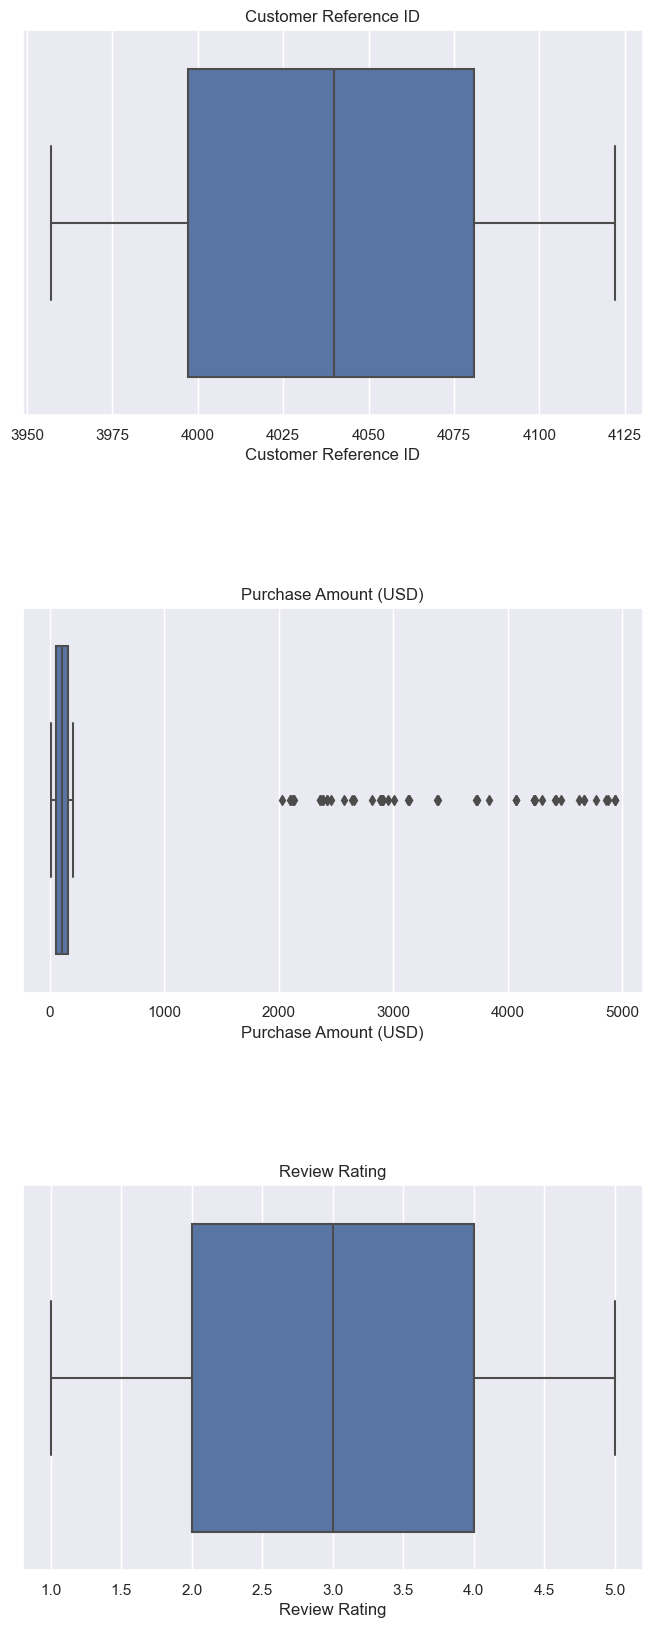

In [502]:
cols_num = ['Customer Reference ID', 'Purchase Amount (USD)', 'Review Rating']

fig, ax =plt.subplots(nrows=3, ncols=1, figsize=(8, 20))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df_imputer, ax=ax[i])
    ax[i].set_title(col)

In [503]:
data = df_imputer.copy()

In [504]:
import plotly.express as px

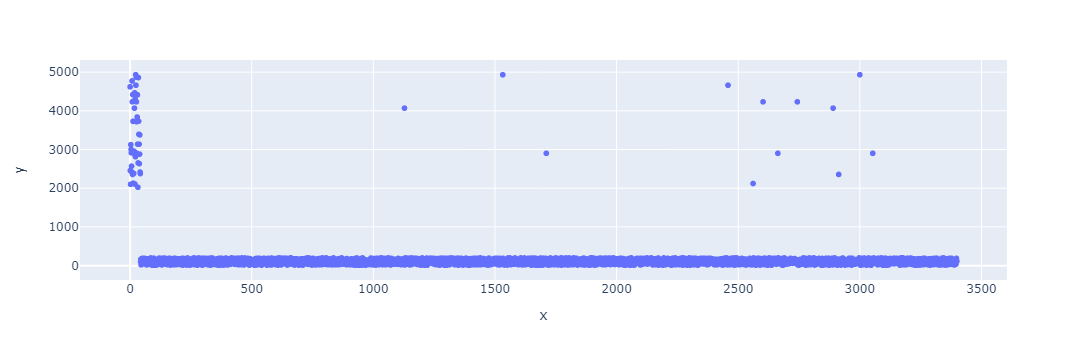

In [505]:
data_amount = data['Purchase Amount (USD)']
fig = px.scatter(y=data_amount, width=800, height=350)
fig.write_image('data_amount.png')
fig.show()

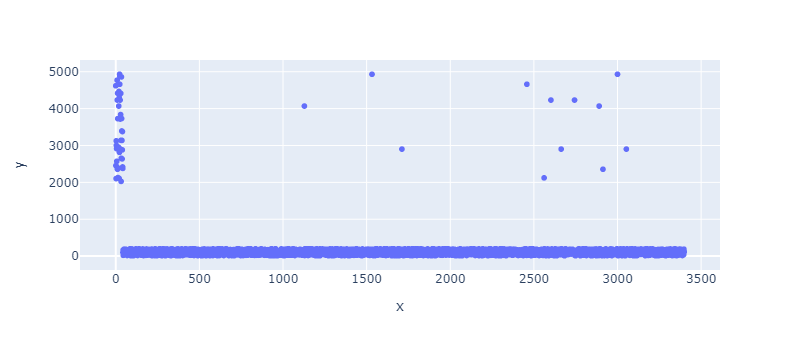

In [506]:
from IPython.display import Image

# Mostrar la imagen estática en el Notebook
Image('data_amount.png')


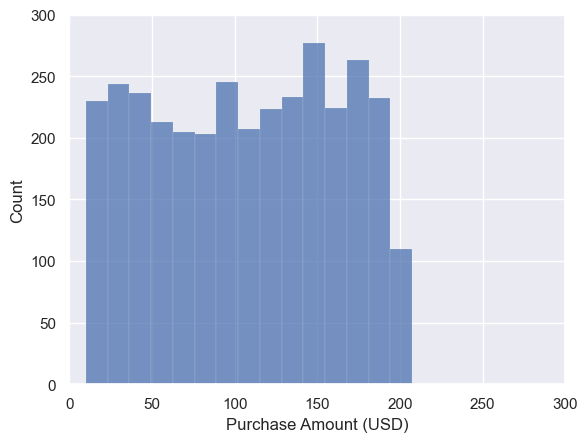

In [507]:
sns.histplot(data['Purchase Amount (USD)'])
plt.xlim(0, 300)
plt.ylim(0, 300)
plt.show();

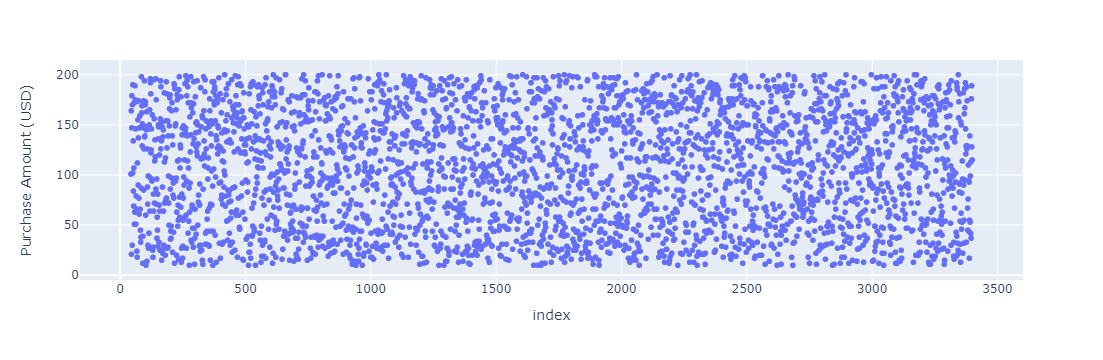

In [508]:
# Recorte de Outliers
q1, q3 = np.percentile(data['Purchase Amount (USD)'], [25, 75])
IQR = q3 - q1
lim_sup = q3 + 1.5*IQR
lim_inf = q1 - 1.5*IQR
data = data[(data['Purchase Amount (USD)'] <= lim_sup) & (data['Purchase Amount (USD)'] >= lim_inf)]
fig = px.scatter(data, y='Purchase Amount (USD)', width=800, height=350)
fig.write_image('Purchase Amount (USD).png')
fig.show()

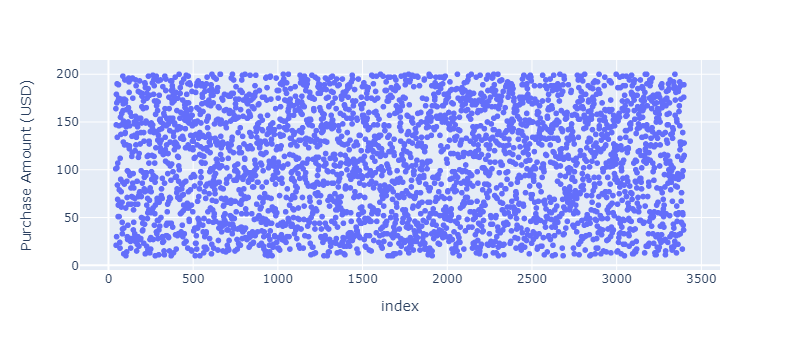

In [509]:
Image('Purchase Amount (USD).png')

### EDA

<a id="pv"><a>
#### *¿Cuáles son los productos más vendidos?*

In [510]:
best_products = data['Item Purchased'].value_counts()
best_products

Item Purchased
Belt             89
Skirt            88
Shorts           86
Pants            85
T-shirt          81
Tank Top         81
Pajamas          79
Camisole         76
Loafers          75
Hoodie           74
Wallet           72
Blouse           72
Kimono           72
Vest             71
Socks            71
Backpack         71
Poncho           71
Cardigan         71
Sneakers         71
Handbag          70
Onesie           70
Raincoat         69
Umbrella         69
Blazer           68
Hat              68
Sunglasses       67
Trench Coat      66
Coat             66
Swimsuit         65
Scarf            64
Romper           63
Flannel Shirt    63
Jacket           63
Boots            62
Leggings         61
Sweater          61
Overalls         61
Polo Shirt       59
Jumpsuit         57
Gloves           57
Tunic            57
Tie              57
Slippers         56
Dress            56
Jeans            56
Trousers         55
Sandals          53
Bowtie           51
Sun Hat          50
Flip-

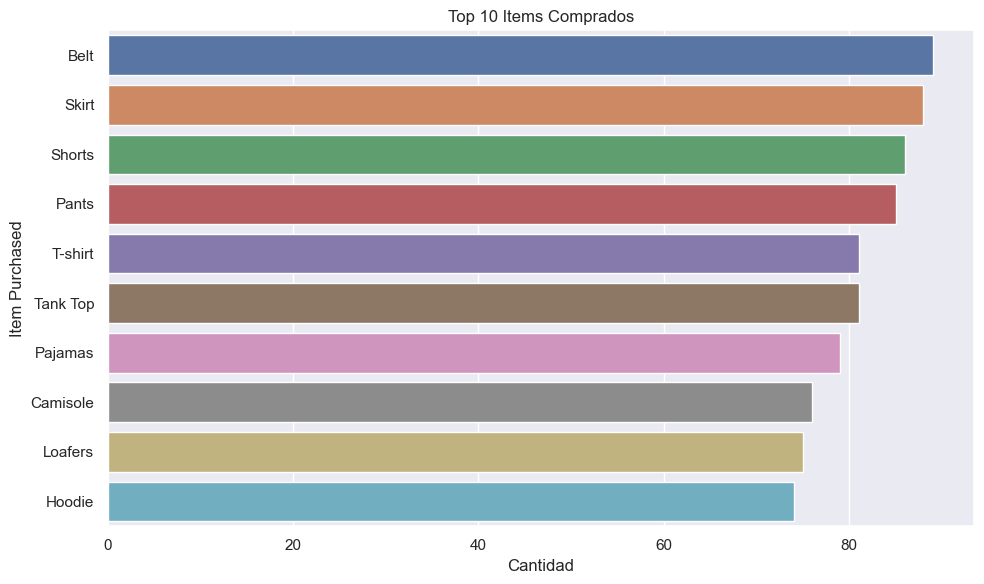

In [511]:
top_10_items = data['Item Purchased'].value_counts().head(10).index


plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data[data['Item Purchased'].isin(top_10_items)], 
                 y='Item Purchased', 
                 order=top_10_items)
plt.title('Top 10 Items Comprados')
plt.xlabel('Cantidad')
plt.ylabel('Item Purchased')
plt.tight_layout()


El top 10 de los productos más vendidos: Belt, Skirt, Shorts, Pants, T-shirt, Tank Top, Pajamas, Camisole, Loafers y Hoodie.

<a id="pi"><a>
#### *¿Cuáles son los productos que generan mayores ingresos?*

In [512]:
fechas_unicas = data['Date Purchase'].unique()
fechas_unicas.shape

(365,)

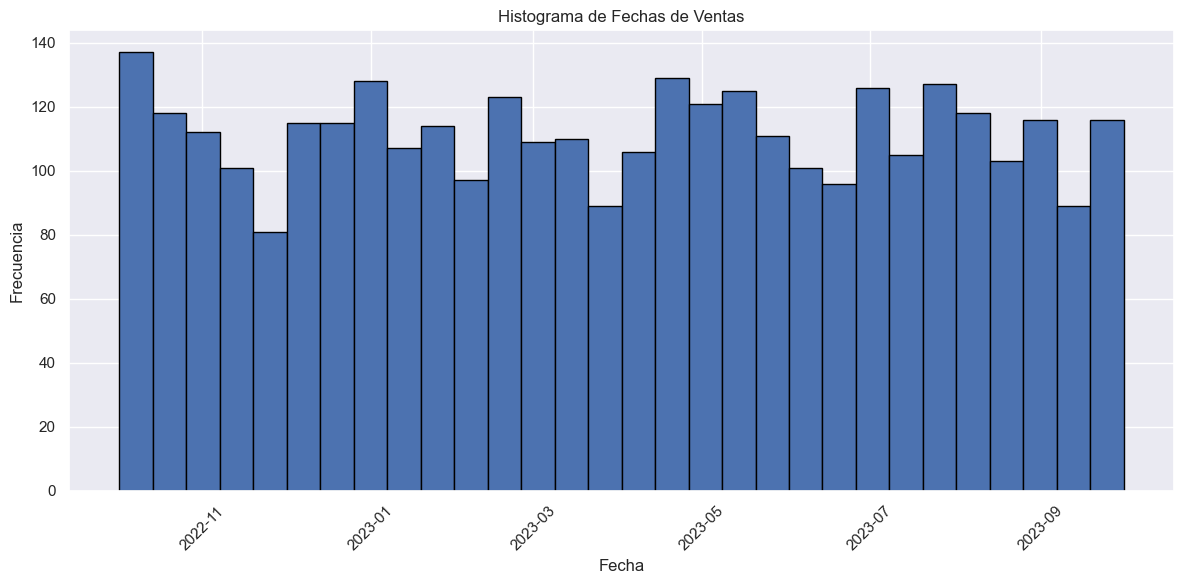

In [513]:
# Distribución de fechas
plt.figure(figsize=(12, 6))
data['Date Purchase'].hist(bins=30, edgecolor='black')
plt.title('Histograma de Fechas de Ventas')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [514]:
# Frecuencia de compra por producto
product_counts = data['Item Purchased'].value_counts()
print("Frecuencia de compra por producto:")
print(product_counts.head(10))

# Ingresos por producto
revenue_per_product = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().sort_values(ascending=False)
print("\nIngresos por producto:")
print(revenue_per_product.head(10))

Frecuencia de compra por producto:
Item Purchased
Belt        89
Skirt       88
Shorts      86
Pants       85
T-shirt     81
Tank Top    81
Pajamas     79
Camisole    76
Loafers     75
Hoodie      74
Name: count, dtype: int64

Ingresos por producto:
Item Purchased
Tunic         17275.0
Jeans         13068.0
Pajamas       12798.0
Shorts        12702.0
Handbag       12668.0
Gloves        12330.0
Boots         11891.0
Poncho        11422.0
Flip-Flops    11309.0
Slippers      11284.0
Name: Purchase Amount (USD), dtype: float64


* Los productos mas vendidos son: Belt, Skirt, Pants y Shorts.
* Los productos que generan mas ingresos son: Tunic, Jeans, Pajamas.

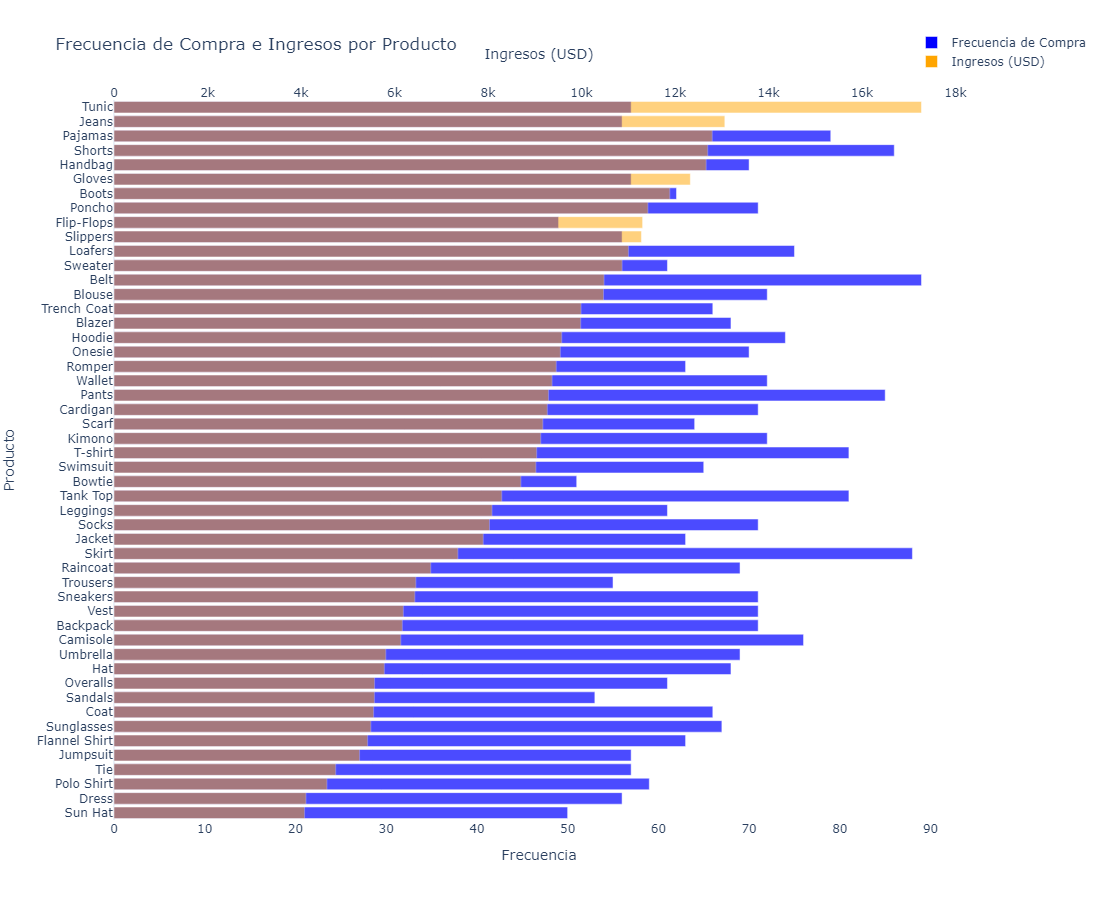

In [515]:
import plotly.graph_objects as go

# Índice para cada conjunto de datos
product_counts_df = product_counts.reset_index()
product_counts_df.columns = ['Producto', 'Frecuencia']

revenue_per_product_df = revenue_per_product.reset_index()
revenue_per_product_df.columns = ['Producto', 'Ingresos']

# Merge para garantizar que estén alineados correctamente
product_analysis = pd.merge(product_counts_df, revenue_per_product_df, on='Producto', how='inner')

# Ordenado por frecuencia para mejor visualización en la gráfica
product_analysis = product_analysis.sort_values(by='Ingresos')


fig = go.Figure()

# Frecuencia (primer eje X)
fig.add_trace(go.Bar(
    y=product_analysis['Producto'],
    x=product_analysis['Frecuencia'],
    name='Frecuencia de Compra',
    orientation='h',
    marker=dict(color='blue', opacity=0.7),
    xaxis='x1'  
))

# Ingresos (segundo eje X)
fig.add_trace(go.Bar(
    y=product_analysis['Producto'],
    x=product_analysis['Ingresos'],
    name='Ingresos (USD)',
    orientation='h',
    marker=dict(color='orange', opacity=0.5),
    xaxis='x2'  
))

# Configuración de ejes y diseño
fig.update_layout(
    title='Frecuencia de Compra e Ingresos por Producto',
    xaxis=dict(
        title='Frecuencia',
        showgrid=False,
        side='bottom'  
    ),
    xaxis2=dict(
        title='Ingresos (USD)',
        overlaying='x',   
        side='top',      
        showgrid=False
    ),
    yaxis=dict(title='Producto'),
    template='plotly_white',
    width=1100,
    height=900,
    legend=dict(yanchor="top", y=1.1, xanchor="right", x=1.15)
)

fig.write_image('product_analysis.png')
fig.show()


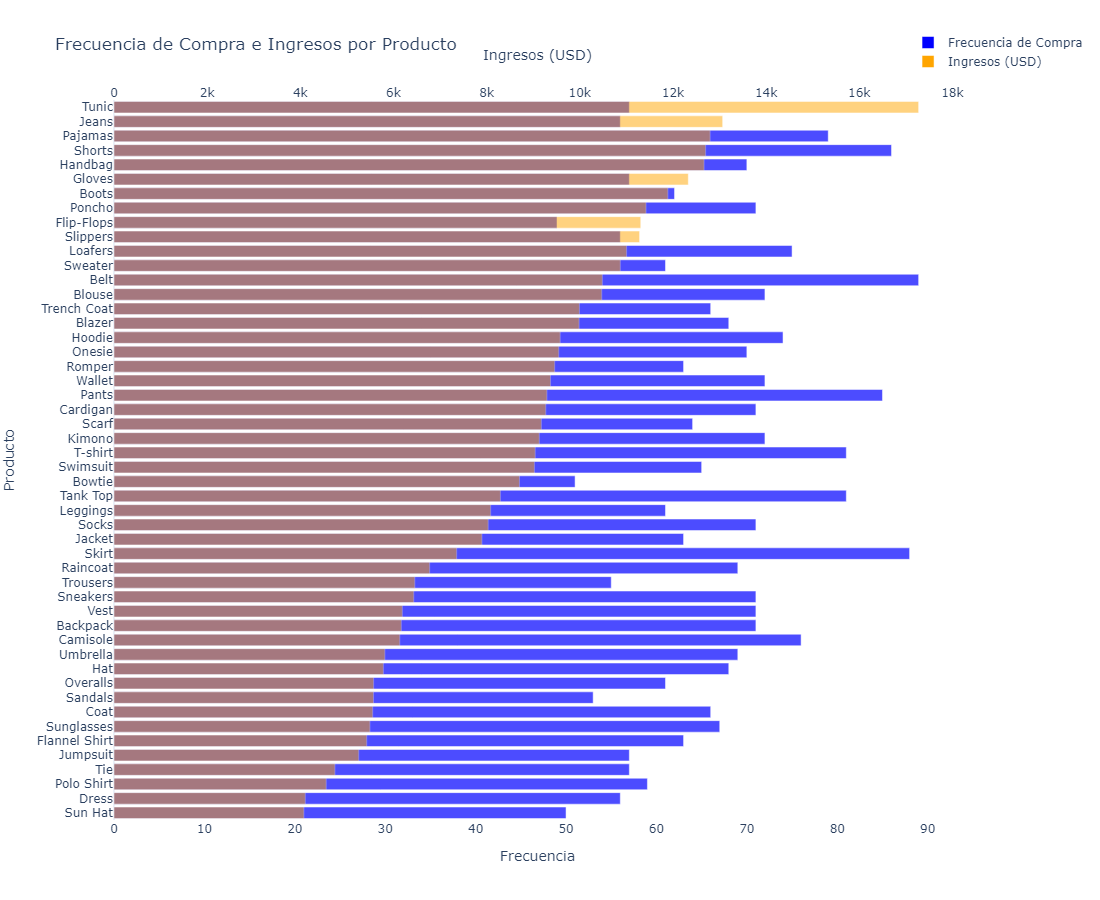

In [516]:
Image('product_analysis.png')

Los productos **Tunic, Jeans, Gloves, Flip-Flops y Slippers** tienen ingresos altos entre los 17.275 USD hasta los 11.284 USD aproximadamente, sin embargo no están entre los mas comprados, por otro lado la variable **Pajamas** y **Shorts** si se encuentran en el top 10 de los productos más vendidos con ingresos al rededor de 12.798 USD.

In [517]:
data.set_index('Date Purchase', inplace=True)

In [518]:
data.sort_index(inplace=True)
data.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Review Rating,Payment Method
Date Purchase,,,,,
2022-10-02,4092,Polo Shirt,200.0,1.8,Credit Card
2022-10-02,4014,Tank Top,99.0,1.2,Cash
2022-10-02,4093,Handbag,24.0,2.8,Credit Card
2022-10-02,4077,T-shirt,175.0,2.1,Cash
2022-10-02,4071,Raincoat,193.0,3.9,Credit Card


In [519]:
rango_fechas = pd.date_range(start=data.index.min(), end=data.index.max(), freq='D')
rango_fechas

DatetimeIndex(['2022-10-02', '2022-10-03', '2022-10-04', '2022-10-05',
               '2022-10-06', '2022-10-07', '2022-10-08', '2022-10-09',
               '2022-10-10', '2022-10-11',
               ...
               '2023-09-22', '2023-09-23', '2023-09-24', '2023-09-25',
               '2023-09-26', '2023-09-27', '2023-09-28', '2023-09-29',
               '2023-09-30', '2023-10-01'],
              dtype='datetime64[ns]', length=365, freq='D')

In [520]:
rango_fechas.difference(data.index)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

<a id="variacion"><a>
#### *¿Cómo varían las ventas a lo largo del tiempo (diarias, semanales, mensuales, anuales)?*

In [521]:
df_monthly = data['Purchase Amount (USD)']
df_monthly

Date Purchase
2022-10-02    200.0
2022-10-02     99.0
2022-10-02     24.0
2022-10-02    175.0
2022-10-02    193.0
              ...  
2023-10-01     46.0
2023-10-01     46.0
2023-10-01    151.0
2023-10-01    122.0
2023-10-01     58.0
Name: Purchase Amount (USD), Length: 3345, dtype: float64

In [522]:
ventas_diarias = data['Purchase Amount (USD)'].resample('D').sum()
ventas_semanales = data['Purchase Amount (USD)'].resample('W').sum()
ventas_mensuales = data['Purchase Amount (USD)'].resample('M').sum()
ventas_anuales = data['Purchase Amount (USD)'].resample('A').sum()

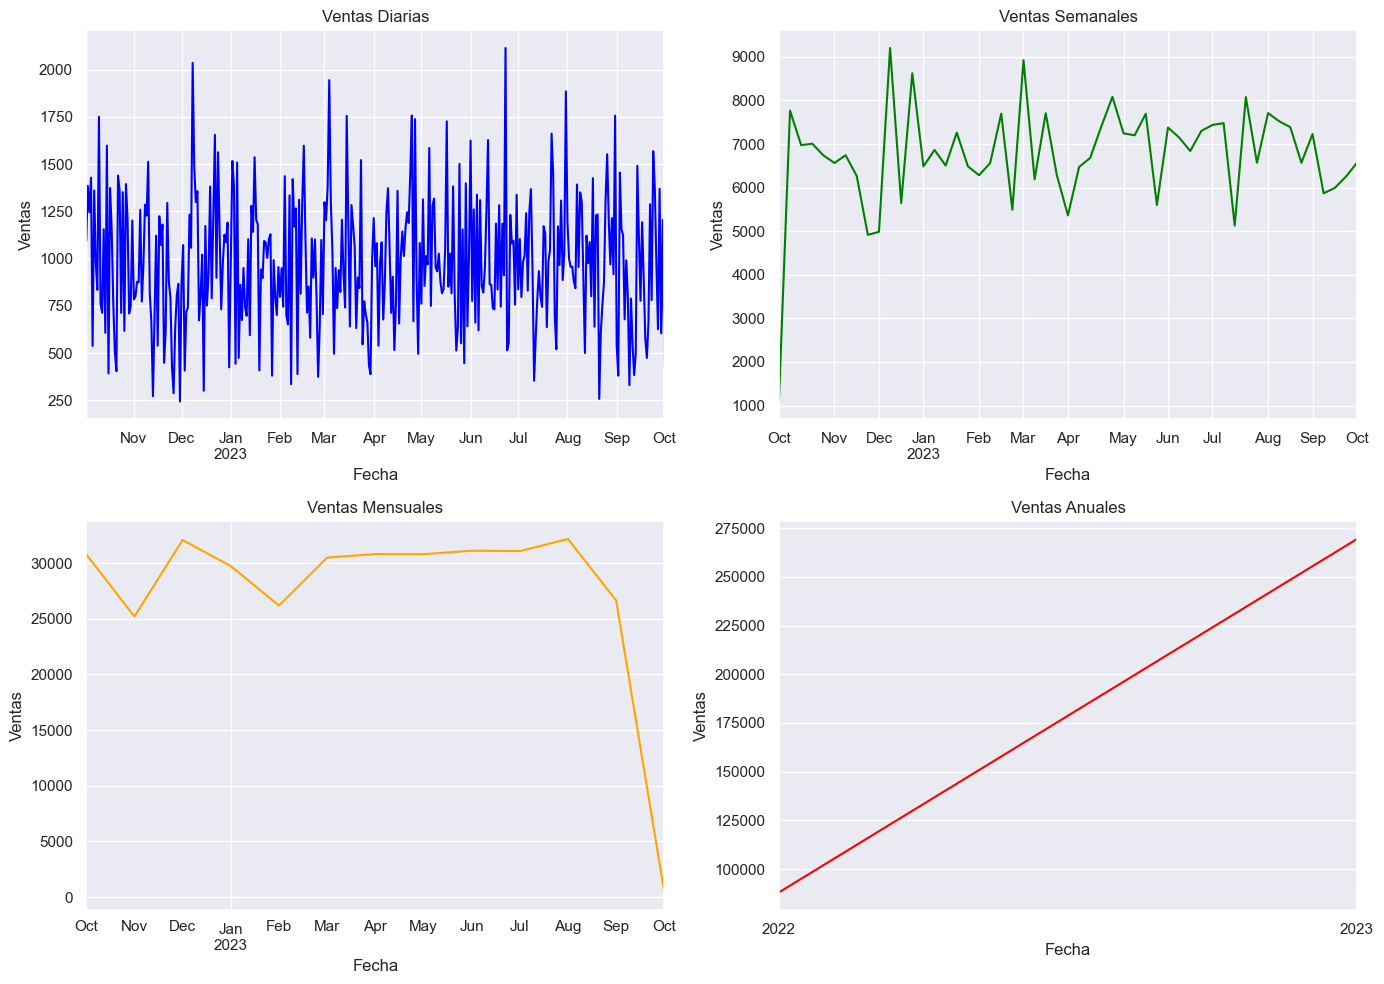

In [523]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
ventas_diarias.plot(title='Ventas Diarias', xlabel='Fecha', ylabel='Ventas', color='blue')

plt.subplot(2, 2, 2)
ventas_semanales.plot(title='Ventas Semanales', xlabel='Fecha', ylabel='Ventas', color='green')

plt.subplot(2, 2, 3)
ventas_mensuales.plot(title='Ventas Mensuales', xlabel='Fecha', ylabel='Ventas', color='orange')

plt.subplot(2, 2, 4)
ventas_anuales.plot(title='Ventas Anuales', xlabel='Fecha', ylabel='Ventas', color='red')

plt.tight_layout()
plt.show()

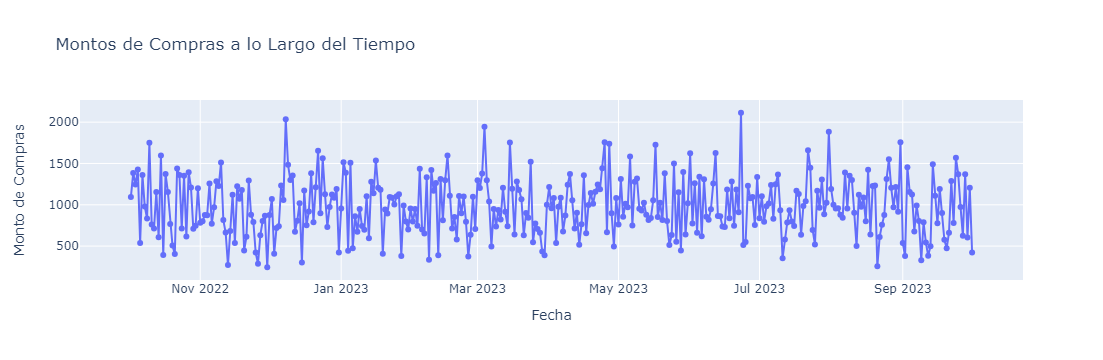

In [524]:
df_monthly = data['Purchase Amount (USD)'].resample('D').sum()

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_monthly.index, y=df_monthly, mode='lines+markers', name='Monto de compras'))

fig.update_layout(
    title='Montos de Compras a lo Largo del Tiempo',
    xaxis_title='Fecha',
    yaxis_title='Monto de Compras',
    template='plotly'
)

fig.write_image('df_monthly.png')
fig.show()

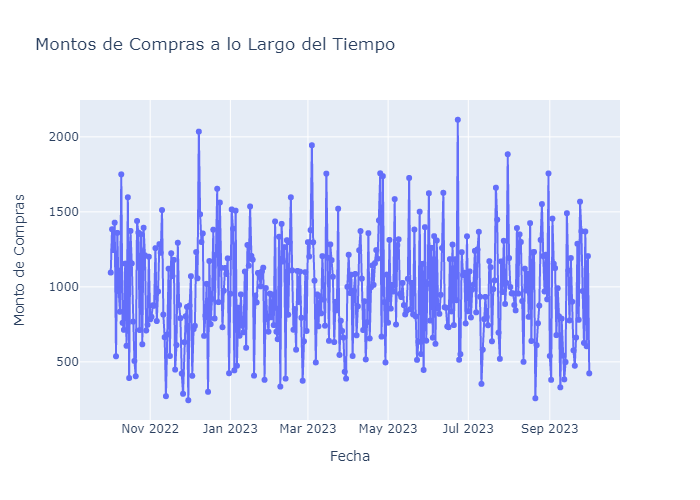

In [525]:
Image('df_monthly.png')

* Los meses con mayores ventas fueron Diciembre de 2022 y Marzo de 2023
* Se observa una baja en las ventas desde Agosto hasta Octubre de 2023, alcanzando minimos por debajo de 500 USD 

<a id='patrones'> <a>
#### *¿Existen patrones de estacionalidad en las ventas?*

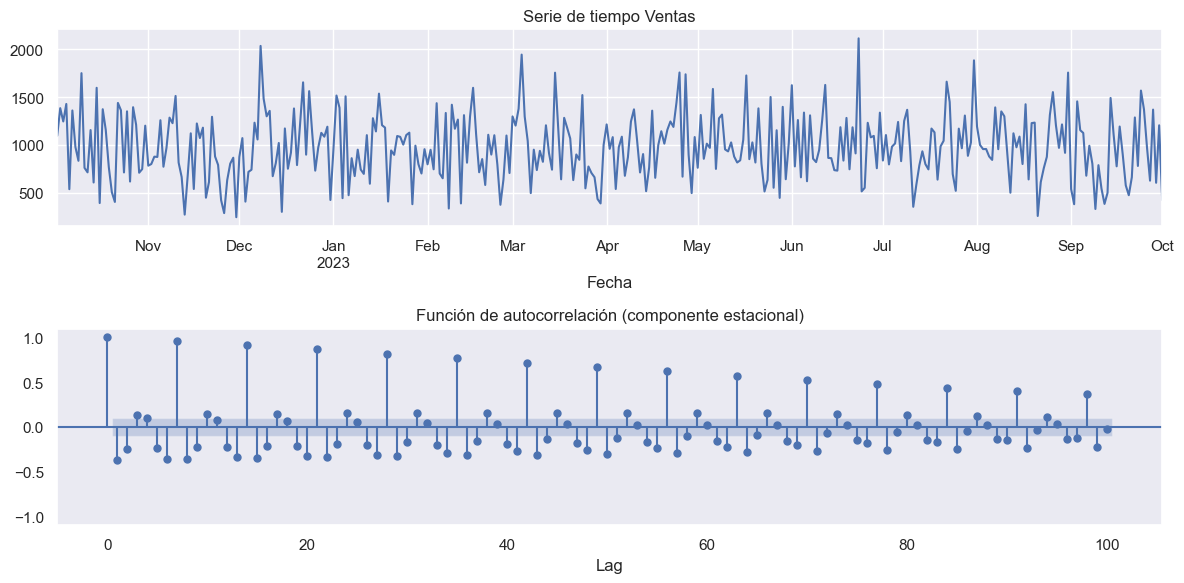

In [526]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import STL

fig, ax = plt.subplots(2,1, figsize=(12,6))

df_monthly.plot(ax=ax[0])
ax[0].set_xlabel('Fecha')
ax[0].set_title('Serie de tiempo Ventas')

# Descomposición STL
serie_stl = STL(df_monthly, seasonal=31).fit()
df_monthly = serie_stl.seasonal
titulo_acf = 'Función de autocorrelación (componente estacional)'

plot_acf(df_monthly.to_numpy(),
        adjusted = True,
        alpha = 0.05, 
        lags = 100,
        bartlett_confint = False,
        ax = ax[1])
ax[1].set_xlabel('Lag')
ax[1].set_ylim([-1.1, 1.1])
ax[1].grid()
ax[1].set_title(titulo_acf)
fig.tight_layout()

*  Las oscilaciones muestran un patrón repetitivo semanal dentro de cada mes, lo que indica que las ventas siguen un ciclo semanal.
* La tendencia descendente sugiere que existe un patrón persistente a lo largo de tiempo

## Consluciones

* Productos Más Vendidos vs. Productos Más Rentables:

    Aunque productos como Skirt, Belt, Pants y Shorts dominan en términos de volumen de ventas, otros como Tunic, Jeans y Gloves generan mayores             ingresos, destacando la importancia de considerar no solo la cantidad vendida, sino también el margen de ganancia.
    La discrepancia entre productos más vendidos y más rentables sugiere que una estrategia enfocada en promover artículos de alto valor, como Tunic y       Jeans, podría maximizar los ingresos sin depender exclusivamente de los productos más populares.

* Variación de Ventas a lo Largo del Tiempo:

    Los picos de ventas en meses como diciembre de 2022 y abril de 2023 pueden estar asociados con eventos estacionales o promociones específicas.
    La caída observada entre agosto y octubre de 2023 destaca la necesidad de investigar factores internos (como inventarios o campañas de marketing) y      externos (como cambios económicos o estacionales) que pudieron haber influido en la disminución.

* Patrones de Estacionalidad y Tendencias:

    El comportamiento semanal recurrente sugiere que las ventas están influenciadas por un ciclo semanal, lo que puede ser útil para planificar              inventarios y estrategias promocionales.
    La tendencia descendente a largo plazo resalta la importancia de intervenir estratégicamente para revertir esta disminución, ya sea mediante nuevas      líneas de productos, campañas de fidelización de clientes o promociones dirigidas.

## Recomendaciones

* Optimización del Catálogo de Productos: Priorizar la promoción de artículos rentables, como Tunic y Jeans, a través de campañas de marketing             dirigidas. Además, asegurar una oferta adecuada de productos como Pajamas y Shorts, que combinan alta demanda e ingresos.

* Estrategias de Ventas Estacionales: Desarrollar campañas dirigidas a meses con ventas históricamente altas, como diciembre, y diseñar iniciativas para   contrarrestar la caída en ventas durante los meses de baja actividad.